<font color = green >


# Dimensionality reduction

</font>

Objectives:
- visualization 
- data compression 

<font color = green >

### Data compression

</font>

<img src = "img/pca_1.png" height=300 width= 300>
<img src = "img/pca_2.png" height=300 width= 300>


<font color = green >

### Data compression

</font>

$$X\in R^{3} \quad  \longrightarrow  \quad Z\in R^{2}$$


<img src = "img/pca_3.png" height=300 width= 300  align = 'left'>
<img src = "img/pca_5.png" height=300 width= 300  align = 'left'>

<img src = "img/pca_6.png" height=300 width= 300  align = 'left'>


<font color = green >


## Principle Component Analisis (PCA)

</font>

Find the lower dimensional surface that minimizes projection error.

From 2-dimension to 1-dimension, find the direction(vector $\overrightarrow {u} \in R^{2}$):

<img src = "img/pca_8.png" height=300 width= 300  align = 'left'>



From n-dimension to k-dimension, find the $k$ vectors $\overrightarrow {u_{1}}, \overrightarrow {u_{2}}, ...\overrightarrow {u_{k}}$, each  ${u_{i}} \in R^{n}$, s.t. minimizes projection of data onto those vectors.


#### Note: It's important to normalize (scale) features first

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
%matplotlib notebook

In [3]:
from sklearn.datasets import make_regression

In [4]:
x,y = make_regression(n_samples=200, n_features=1, noise=50, random_state=150)
# n_samples= 200
# intercept = 0
# coef = .3
# np.random.seed(0)
# x = np.random.normal(loc=0, scale=2, size=n_samples)
# # x = np.random.uniform(0,10, size=n_samples)
# y = intercept + x * coef + np.random.normal(loc=0, scale=.2, size=n_samples)

plt.scatter(x, y, s= 40, edgecolor = 'black', label='negative', alpha = 0.7)

<IPython.core.display.Javascript object>

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
X_origin= np.c_[x,y]
X=  scaler.fit_transform(X_origin)
m,n = X.shape
plt.figure()
plt.scatter(X[:,0], X[:,1], s= 40, edgecolor = 'black', label='negative', alpha = 0.7)


<IPython.core.display.Javascript object>

<font color = green >


### Covariance Matrix

</font>

In case of each feature have exactly zero mean the $$cov(X)= \frac{1}{m}\cdot X^{T} @ X$$
Note: `np.cov(X)` expects matrix each row of m represents a variable, and each column a single observation of all those variables. You may set rowvar= False or send $X^{T}$ as input param.


In [7]:
cov_matrix= np.cov(X.T, ddof=0) # ddof=0 will return the simple average 
print('numpy cov_matrix:\n', cov_matrix)
sigma = 1/(m) * X.T @ X
print('\ncomputed explicitly cov_matrix:\n', sigma)

numpy cov_matrix:
 [[1.         0.89552492]
 [0.89552492 1.        ]]

computed explicitly cov_matrix:
 [[1.         0.89552492]
 [0.89552492 1.        ]]


<font color = green >


### Eigenvectors 

</font>

${ A\mathbf {v} =\lambda \mathbf {v} }$


<img src = "https://upload.wikimedia.org/wikipedia/commons/3/3c/Mona_Lisa_eigenvector_grid.png" height=400 width= 400  align = 'left'>

<div style="clear:left;"></div>

In this shear mapping the red arrow changes direction but the blue arrow does not.<br> The <font color = blue ><b>blue </b></font> arrow is an eigenvector  of this shear mapping because it does not change direction, and since its length is unchanged, its eigenvalue is 1.

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/2/25/Mona_Lisa_with_eigenvector.png/1024px-Mona_Lisa_with_eigenvector.png" height=400 width= 400  align = 'left'>

<div style="clear:left;"></div>

The red arrow does not change direction but the blue arrow does. .<br>The <font color = red ><b>red </b></font> arrow is an eigenvector now. 




In [8]:
# deliberately created cell to avoid skipping next  cell execution

In [9]:
w, v = np.linalg.eig(cov_matrix) # w - eigenvalues, v - normalized eigenvectors,  
# such that the column v[:,i] is the eigenvector corresponding to the eigenvalue w[i]
v

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [10]:
plt.figure()
plt.scatter(X[:,0], X[:,1], s= 40, edgecolor = 'black', label='negative', alpha = 0.7)

v0= v[:, 0] # Note: every columns is vector 
v1= v[:, 1]

plt.plot ([0, v0[0]*3],[0, v0[1]*3], '-', c= 'r')
plt.plot ([0, v1[0]*3],[0, v1[1]*3], '-', c= 'g')

<IPython.core.display.Javascript object>

<font color = green >

### Transfrom data

</font>

Select $k$ of $n$ computed eigenvalues and transform data $Z= X @ U_{reduce}$ (shape is (m,k), where $U_{reduce}$  is matrix of $k$ eigenvectors (shape is (n,k))


In [11]:
k = 1
U_reduce = v[:, :k] 
Z= X@ U_reduce
print (Z.shape)
Z[:10]

(200, 1)


array([[ 0.6049806 ],
       [ 1.80500688],
       [-0.23794344],
       [ 0.39228405],
       [-0.37834171],
       [ 1.28401895],
       [-0.33232537],
       [ 0.07685455],
       [-1.41229873],
       [-1.29273423]])

<font color = green >

### Decompress data 

</font>


In [12]:
X_approximate = Z @ U_reduce.T

In [13]:
X_approximate.shape

(200, 2)

In [14]:
plt.figure()
plt.scatter(X_approximate[:,0], X_approximate[:,1], s= 40, edgecolor = 'black', label='negative', alpha = 0.7)


<IPython.core.display.Javascript object>

<font color = green >

## sklearn

</font>



In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print (pca.components_) # components_ : array, shape (n_components, n_features)

plt.figure()
plt.scatter(X[:,0], X[:,1], s= 40, edgecolor = 'black', label='negative', alpha = 0.7)

v0= pca.components_[0] # Note: every row is vector 
v1= pca.components_[1]

plt.plot ([0, v0[0]*3],[0, v0[1]*3], '-', c= 'r')
plt.plot ([0, v1[0]*3],[0, v1[1]*3], '-', c= 'g')

[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


<IPython.core.display.Javascript object>

In [16]:
v

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

<font color = green >

#### Transform data 

</font>


In [17]:
Z= pca.transform(X)
print (Z.shape)
Z[:10]

(200, 2)


array([[ 0.6049806 , -0.23289819],
       [ 1.80500688, -0.14390189],
       [-0.23794344,  0.0419352 ],
       [ 0.39228405,  0.12971415],
       [-0.37834171,  0.09603827],
       [ 1.28401895,  0.39703249],
       [-0.33232537,  0.1247178 ],
       [ 0.07685455, -0.11897265],
       [-1.41229873, -0.36088833],
       [-1.29273423,  0.89024902]])

<font color = green >

#### Check explicit  transforming data 

</font>


In [18]:
eigen_vecors= pca.components_  
U_reduce = eigen_vecors[:2]
Z= X @ U_reduce.T
print (Z.shape)
Z[:10]

(200, 2)


array([[ 0.6049806 , -0.23289819],
       [ 1.80500688, -0.14390189],
       [-0.23794344,  0.0419352 ],
       [ 0.39228405,  0.12971415],
       [-0.37834171,  0.09603827],
       [ 1.28401895,  0.39703249],
       [-0.33232537,  0.1247178 ],
       [ 0.07685455, -0.11897265],
       [-1.41229873, -0.36088833],
       [-1.29273423,  0.89024902]])

<font color = green >

#### Decompress data 

</font>


In [19]:
pca = PCA(n_components=1)
Z= pca.fit_transform(X)

# eigen_vecors= pca.components_ 
# X_approximate = Z @ eigen_vecors
X_approximate = pca.inverse_transform(Z)

plt.figure()
plt.scatter(X_approximate[:,0], X_approximate[:,1], s= 40, edgecolor = 'black', label='negative', alpha = 0.7)


<IPython.core.display.Javascript object>

<font color = green >

## Determine number $k$ of pronciple components 

</font>

For given $k$, compute $U_{reduce}$, $Z$, $X_{approx}$ and check condition

$$ \frac { \sum _{ i=0 }^{ m-1 }{ \left\| x^{ (i) }-x_{ approx }^{ (i) } \right\| ^{ 2 } }  }{ \sum _{ i=0 }^{ m-1 }{ \left\| x^{ (i) } \right\| ^{ 2 } }  } \le \quad 0.05$$

Fine the smallest $k$ s.t. it satisfies condition.

In [20]:
def comress_score(X, X_approximate):
    return np.sum(np.apply_along_axis (np.linalg.norm,1, (X-X_approximate))**2)/\
        np.sum(np.apply_along_axis (np.linalg.norm,1, X)**2)
comress_score(X, X_approximate)

0.05223753781771527

<font color = green >

## Sample: compress images with PCA

</font>


In [21]:
from scipy.io import loadmat
fn = 'pca_faces.mat'

<font color = green >

### Load data 

</font>


In [22]:
mat= loadmat(fn)
X= mat['X']
X.shape

FileNotFoundError: [Errno 2] No such file or directory: 'pca_faces.mat'

In [ ]:
def display_samples_in_grid(X, n_rows, n_cols= None):
    if n_cols is None:
        n_cols= n_rows
    indices = np.random.randint(0, len(X),n_rows*n_cols)

    for i in range (n_rows):
        for j in range (n_cols):
            index = n_cols*i+j

            x= X[index]

            height = width = int(np.sqrt(len(x)))
            # max_val = np.max(np.abs(x))
            x = x.reshape (height, width).T # max_val
            
            ax = plt.subplot(n_rows,n_cols, index+1)
            ax.imshow(x, cmap='Greys_r')

            plt.axis('off')

n_rows, n_cols = 4, 8
plt.figure(figsize=(n_cols, n_rows))
display_samples_in_grid(X, n_rows, n_cols)

<font color = green >

### Scale 

</font>


In [ ]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
# x_inversed = scaler.inverse_transform(X_scaled)
plt.figure(figsize=(n_cols, n_rows))
display_samples_in_grid(X_scaled, n_rows, n_cols, )

<font color = green >

### Run PCA 

</font>


In [ ]:
pca = PCA(n_components=200)
Z= pca.fit_transform(X_scaled)
print ('Z.shape = ',Z.shape)
X_approximate = pca.inverse_transform(Z)

plt.figure(figsize=(n_cols, n_rows))
display_samples_in_grid(X_approximate, n_rows, n_cols)

print ('Compress score= {0:.3f}'.format(comress_score(X_scaled, X_approximate)))

<font color = green >

### Run w/o scaling 

</font>


In [ ]:
pca = PCA(n_components=100)
Z= pca.fit_transform(X)
print ('Z.shape = ',Z.shape)
X_approximate = pca.inverse_transform(Z)

plt.figure(figsize=(n_cols, n_rows))
display_samples_in_grid(X_approximate, n_rows, n_cols)
print ('Compress score= {0:.3f}'.format(comress_score(X, X_approximate)))

<font color = green >

## Home Task

</font>

Apply PCA to breast cancer dataset and visualize 2 principle components.

<font color = blue >

### Expected output

</font>

<img src = "img/breast_cancer_pca.png" align = 'left'>


<font color = green >

## Learn more
</font>

[numpy.cov](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html)

[Eigenvalues and eigenvectors](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors)

[numpy.linalg.eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html)

[sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [42]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

cancer_data = cancer.data
cancer_data.shape


(569, 30)

In [44]:
cancer_labels = cancer.target
cancer_labels.shape

(569,)

In [47]:
final_cancer_data = np.concatenate([cancer_data,labels],axis=1)
final_cancer_data.shape

(569, 31)

In [53]:
cancer_dataset = pd.DataFrame(final_cancer_data)
features = cancer.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [56]:
features_labels = np.append(features,'label')

In [80]:
cancer_dataset.columns = features_labels
cancer_dataset.drop(columns=['label'], inplace=True)
cancer_dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer_dataset)

StandardScaler()

In [84]:
scaled_df = scaler.transform(cancer_dataset)

In [86]:
pd.DataFrame(scaled_df)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_df)

PCA(n_components=2)

In [87]:
x_pca = pca.transform(scaled_df)

In [88]:
scaled_df.shape

(569, 30)

In [89]:
x_pca.shape

(569, 2)

<IPython.core.display.Javascript object>


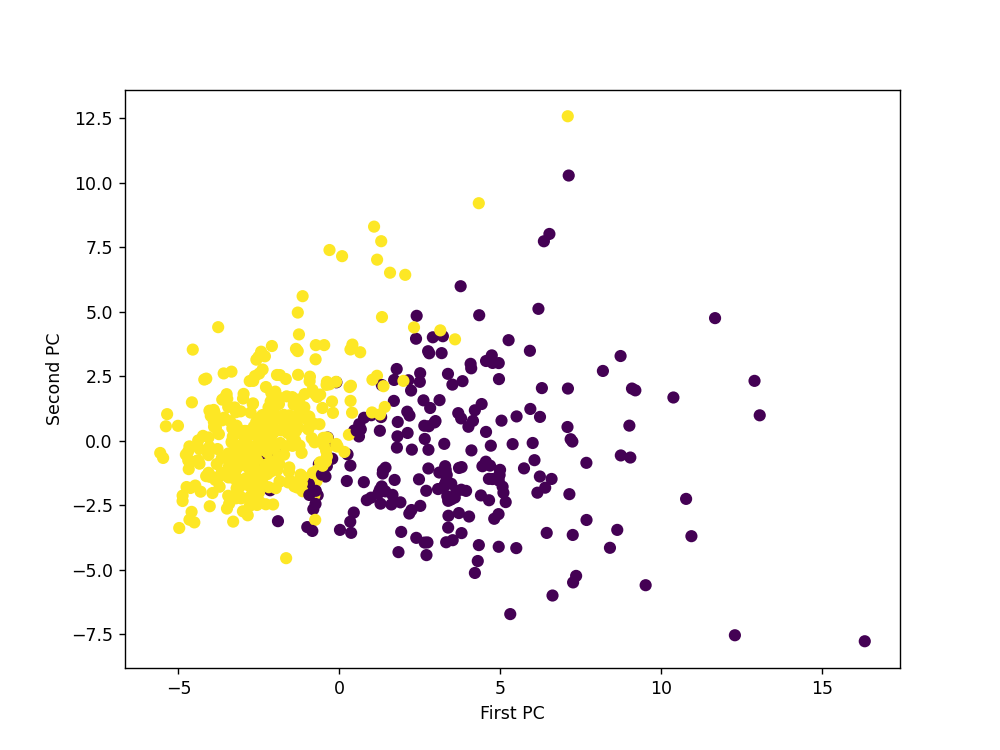

Text(0, 0.5, 'Second PC')

In [93]:
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=cancer['target'])
plt.xlabel('First PC')
plt.ylabel('Second PC')

In [94]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

<IPython.core.display.Javascript object>


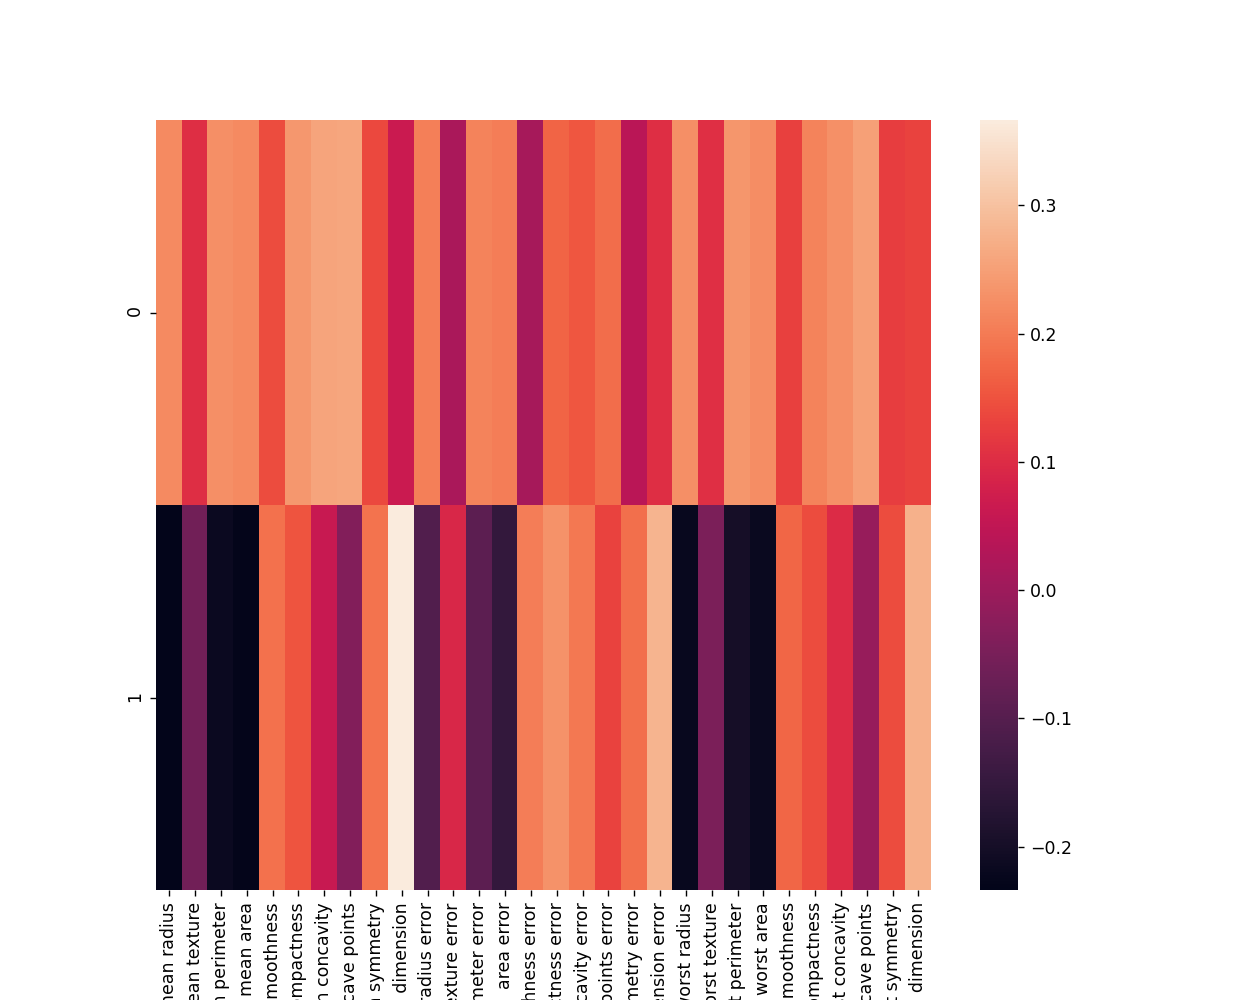

In [98]:
import seaborn as sns
comp = pd.DataFrame(pca.components_, columns=cancer['feature_names'])
plt.figure(figsize=(10, 8))
sns.heatmap(comp);